# Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

# Load data

In [2]:
phising_data = pd.read_csv('phishing_final.csv')

# Understanding dataset

In [3]:
# Display first 5 sample rows of data
phising_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,Yes,Medium,No,NaN,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,No,Yes,No,Yes,Short,No,Medium,NaN,Yes,Two links and above,Reported,Phish
1,No,Medium,No,Yes,No,No,More than one,Short,Yes,Yes,No,Yes,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,No links,Not reported,Phish
2,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,No,Yes,Medium,High,NaN,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,NaN,High,Yes,Some links,Reported,Phish
3,Yes,NaN,Yes,NaN,Yes,No,One,Long,Yes,Yes,Yes,No,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Short,Yes,High,High,Yes,No links,Not reported,Phish
4,Yes,Long,No,Yes,Yes,Yes,None,Short,Yes,Yes,No,Yes,Medium,NaN,Some,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,High,Low,Yes,No links,Reported,Phish


In [4]:
# A summary table of the dataset
phising_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,9947,9937,9957,9952,11055,11055,11055,11055,11055,9972,9976,9956,9948,9977,9950,11055,11055,11055,11055,11055,11055,9971,9934,9941,9982,9961,11055,11055,10001
unique,2,3,2,2,2,2,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,Yes,Short,Yes,Yes,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,Some links,Reported,Phish
freq,7262,8078,8641,8474,8649,9590,4070,7389,9002,9553,8335,5908,4833,4021,7602,8126,9426,9776,9740,10579,8918,10043,5316,6832,5244,7382,8562,6156,9505,5560


In [5]:
# Number of rows with NaN result
print(f'Number of rows without the result: {phising_data[phising_data.Result.isnull()].shape[0]}')

Number of rows without the result: 1054


## Observation

Result has NaN => dont know the outcome => drop row

Several columns have NaN result

# Preprocess

## Drop null

In [6]:
phising_data = phising_data[~phising_data['Result'].isnull()]

In [7]:
phising_data.shape

(10001, 30)

In [8]:
phising_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,10001,8990,8974,9019,8987,10001,10001,10001,10001,10001,9019,9028,9007,8993,9027,8997,10001,10001,10001,10001,10001,10001,9029,8991,8988,9041,9008,10001,10001,10001
unique,2,3,2,2,2,2,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,Yes,Short,Yes,Yes,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,Some links,Reported,Phish
freq,6567,7285,7811,7686,7810,8664,3688,6662,8142,8641,7546,5343,4371,3635,6892,7373,8543,8835,8799,9561,8070,9070,4816,6186,4741,6691,7728,5551,8595,5560


## Visualize data

<Figure size 432x288 with 0 Axes>

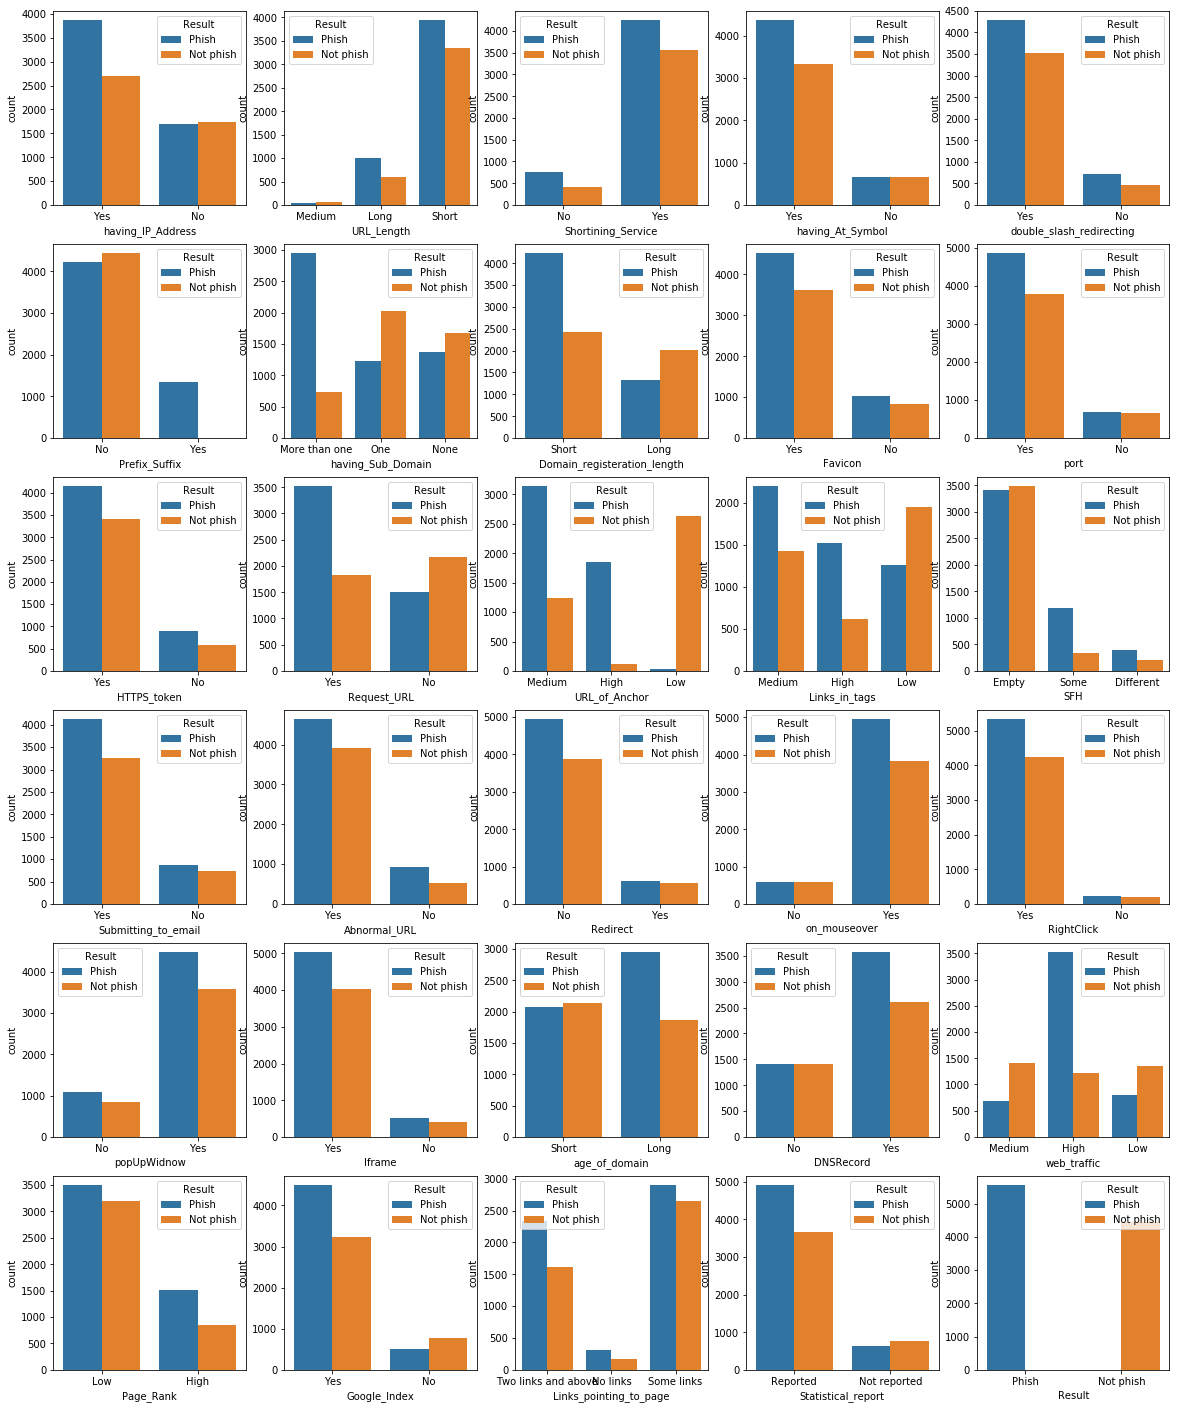

In [9]:
columns_plot = np.array(phising_data.columns).reshape(6, 5)
plt.subplots_adjust(left  = 0.3, right = 0.9, bottom = 0.2, top = 0.9, wspace = 0.3, hspace = 0.3)

f, axes = plt.subplots(6, 5, figsize=(20, 25))
phising_data.columns
for x in range(6):
    for y in range(5):
        sns.countplot(x=columns_plot[x][y], hue='Result', data=phising_data, ax=axes[x][y])

## Fill na with default

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
phising_data['having_IP_Address'] = LabelEncoder().fit_transform(phising_data['having_IP_Address'])

phising_data['URL_Length'] = LabelEncoder().fit_transform(phising_data['URL_Length'].fillna(''))
phising_data['Shortining_Service'] = LabelEncoder().fit_transform(phising_data['Shortining_Service'].fillna(''))
phising_data['having_At_Symbol'] = LabelEncoder().fit_transform(phising_data['having_At_Symbol'].fillna(''))
phising_data['double_slash_redirecting'] = LabelEncoder().fit_transform(phising_data['double_slash_redirecting'].fillna(''))


phising_data['Prefix_Suffix'] = LabelEncoder().fit_transform(phising_data['Prefix_Suffix'])
phising_data['having_Sub_Domain'] = LabelEncoder().fit_transform(phising_data['having_Sub_Domain'])
phising_data['Domain_registeration_length'] = LabelEncoder().fit_transform(phising_data['Domain_registeration_length'])
phising_data['Favicon'] = LabelEncoder().fit_transform(phising_data['Favicon'])
phising_data['port'] = LabelEncoder().fit_transform(phising_data['port'])


phising_data['HTTPS_token'] = LabelEncoder().fit_transform(phising_data['HTTPS_token'].fillna(''))
phising_data['Request_URL'] = LabelEncoder().fit_transform(phising_data['Request_URL'].fillna(''))
phising_data['URL_of_Anchor'] = LabelEncoder().fit_transform(phising_data['URL_of_Anchor'].fillna(''))
phising_data['Links_in_tags'] = LabelEncoder().fit_transform(phising_data['Links_in_tags'].fillna(''))
phising_data['SFH'] = LabelEncoder().fit_transform(phising_data['SFH'].fillna(''))
phising_data['Submitting_to_email'] = LabelEncoder().fit_transform(phising_data['Submitting_to_email'].fillna(''))

phising_data['Abnormal_URL'] = LabelEncoder().fit_transform(phising_data['Abnormal_URL'])
phising_data['Redirect'] = LabelEncoder().fit_transform(phising_data['Redirect'])
phising_data['on_mouseover'] = LabelEncoder().fit_transform(phising_data['on_mouseover'])
phising_data['RightClick'] = LabelEncoder().fit_transform(phising_data['RightClick'])
phising_data['popUpWidnow'] = LabelEncoder().fit_transform(phising_data['popUpWidnow'])
phising_data['Iframe'] = LabelEncoder().fit_transform(phising_data['Iframe'])

phising_data['age_of_domain'] = LabelEncoder().fit_transform(phising_data['age_of_domain'].fillna(''))
phising_data['DNSRecord'] = LabelEncoder().fit_transform(phising_data['DNSRecord'].fillna(''))
phising_data['web_traffic'] = LabelEncoder().fit_transform(phising_data['web_traffic'].fillna(''))
phising_data['Page_Rank'] = LabelEncoder().fit_transform(phising_data['Page_Rank'].fillna(''))
phising_data['Google_Index'] = LabelEncoder().fit_transform(phising_data['Google_Index'].fillna(''))


phising_data['Links_pointing_to_page'] = LabelEncoder().fit_transform(phising_data['Links_pointing_to_page'])
phising_data['Statistical_report'] = LabelEncoder().fit_transform(phising_data['Statistical_report'])
phising_data['Result'] = LabelEncoder().fit_transform(phising_data['Result'])

In [12]:
phising_X, phising_y = phising_data.drop('Result', axis=1), phising_data['Result']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_X, test_X, train_y, test_y = train_test_split(phising_X, phising_y, test_size=0.2, stratify = phising_y, random_state=42)

# Models

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

## Train models

In [71]:
clf_rand = RandomForestClassifier().fit(train_X, train_y)
clf_ada = AdaBoostClassifier().fit(train_X, train_y)
clf_bagging = BaggingClassifier().fit(train_X, train_y)
clf_grad= GradientBoostingClassifier().fit(train_X, train_y)
clf_tree = DecisionTreeClassifier().fit(train_X, train_y)

c:\users\toanq\anaconda3\envs\dl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Use models to predict

In [17]:
predictions_rand = clf_rand.predict(test_X)
predictions_ada = clf_ada.predict(test_X)
predictions_bagging = clf_bagging.predict(test_X)
predictions_grad = clf_grad.predict(test_X)
predictions_tree = clf_tree.predict(test_X)

## Evaluate models

In [18]:
from sklearn.metrics import classification_report

### Random forest

In [29]:
print(classification_report(test_y, predictions_rand))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       889
           1       0.91      0.91      0.91      1112

   micro avg       0.90      0.90      0.90      2001
   macro avg       0.90      0.90      0.90      2001
weighted avg       0.90      0.90      0.90      2001



### Adaboost

In [30]:
print(classification_report(test_y, predictions_ada))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       889
           1       0.87      0.92      0.89      1112

   micro avg       0.88      0.88      0.88      2001
   macro avg       0.88      0.87      0.88      2001
weighted avg       0.88      0.88      0.88      2001



### Bagging

In [31]:
print(classification_report(test_y, predictions_bagging))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       889
           1       0.91      0.90      0.90      1112

   micro avg       0.89      0.89      0.89      2001
   macro avg       0.89      0.89      0.89      2001
weighted avg       0.89      0.89      0.89      2001



### Gradient boosting

In [32]:
print(classification_report(test_y, predictions_grad))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       889
           1       0.89      0.92      0.90      1112

   micro avg       0.89      0.89      0.89      2001
   macro avg       0.89      0.89      0.89      2001
weighted avg       0.89      0.89      0.89      2001



### Decision Tree

In [33]:
print(classification_report(test_y, predictions_tree))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       889
           1       0.89      0.88      0.89      1112

   micro avg       0.88      0.88      0.88      2001
   macro avg       0.87      0.88      0.87      2001
weighted avg       0.88      0.88      0.88      2001



# Feature importances

## Random Forest

No handles with labels found to put in legend.


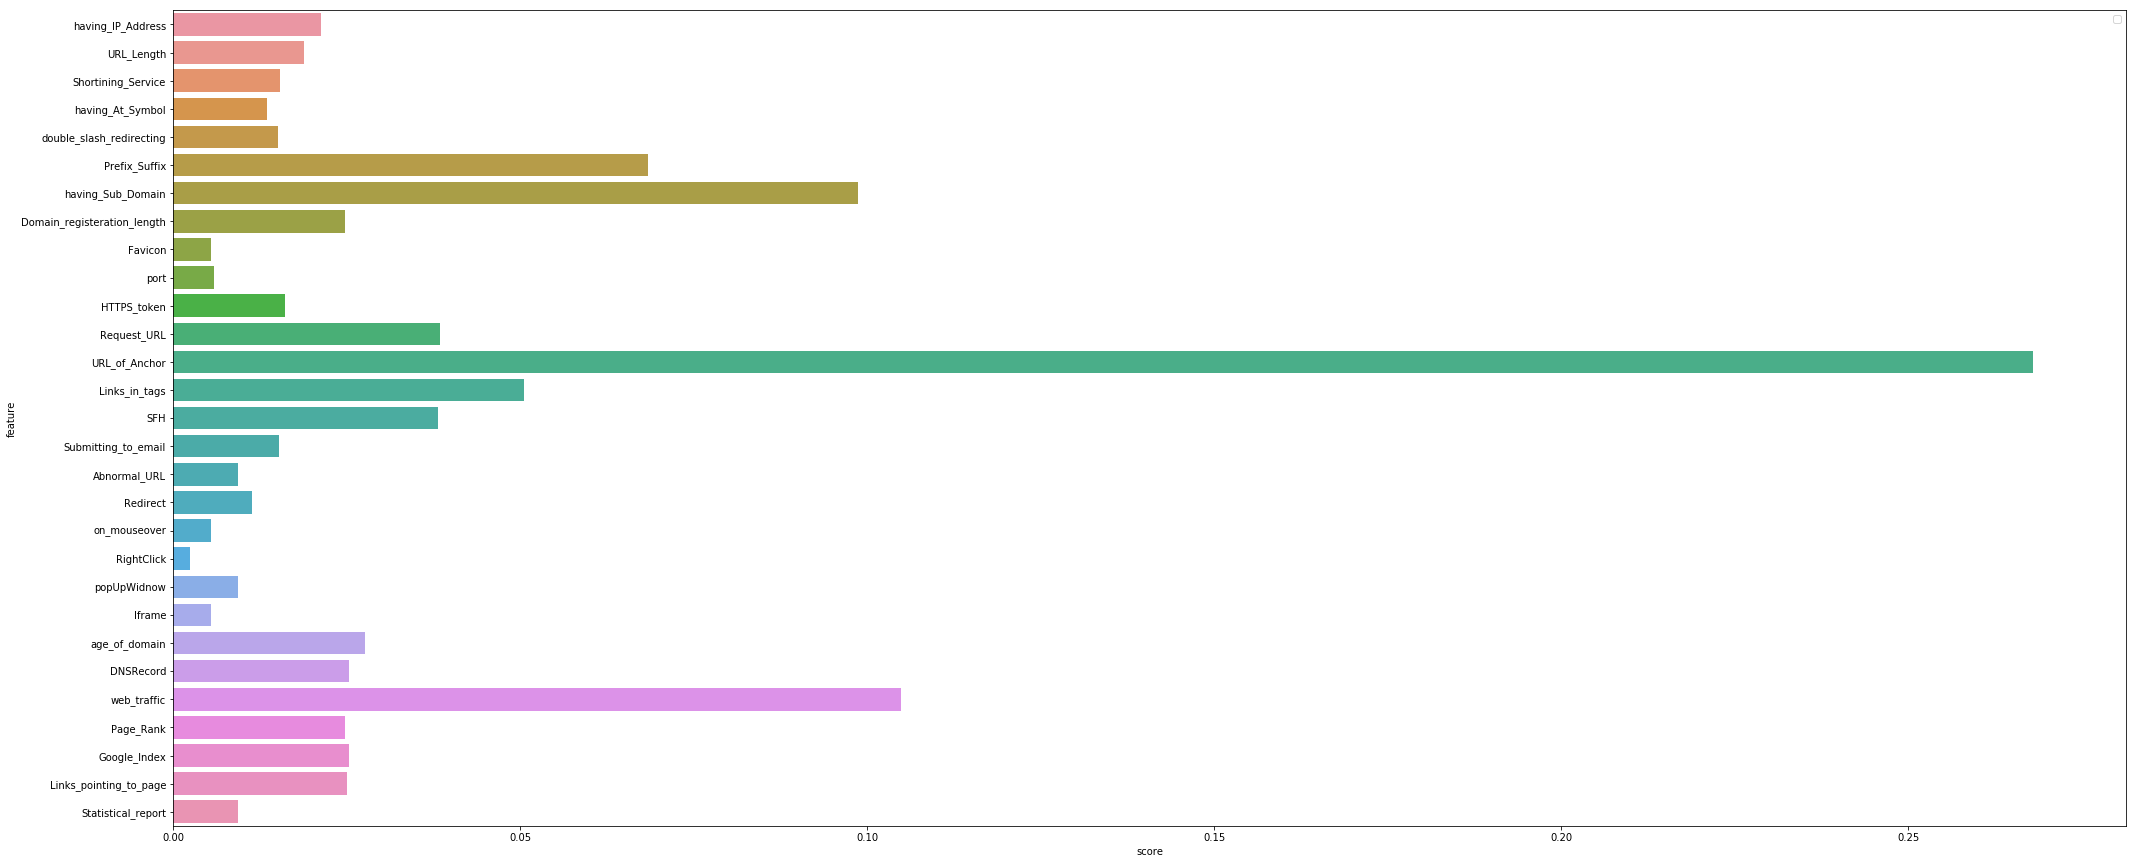

In [65]:
fi_rand = pd.DataFrame(zip(phising_data.columns, map(lambda x: round(x, 4), clf_rand.feature_importances_)), columns=['feature', 'score'])
fig, ax = plt.subplots(1, 1, figsize=(35, 15))
sns.barplot(x='score', y='feature', data=fi_rand, ax=ax)
ax.legend()

## Adaboost

No handles with labels found to put in legend.


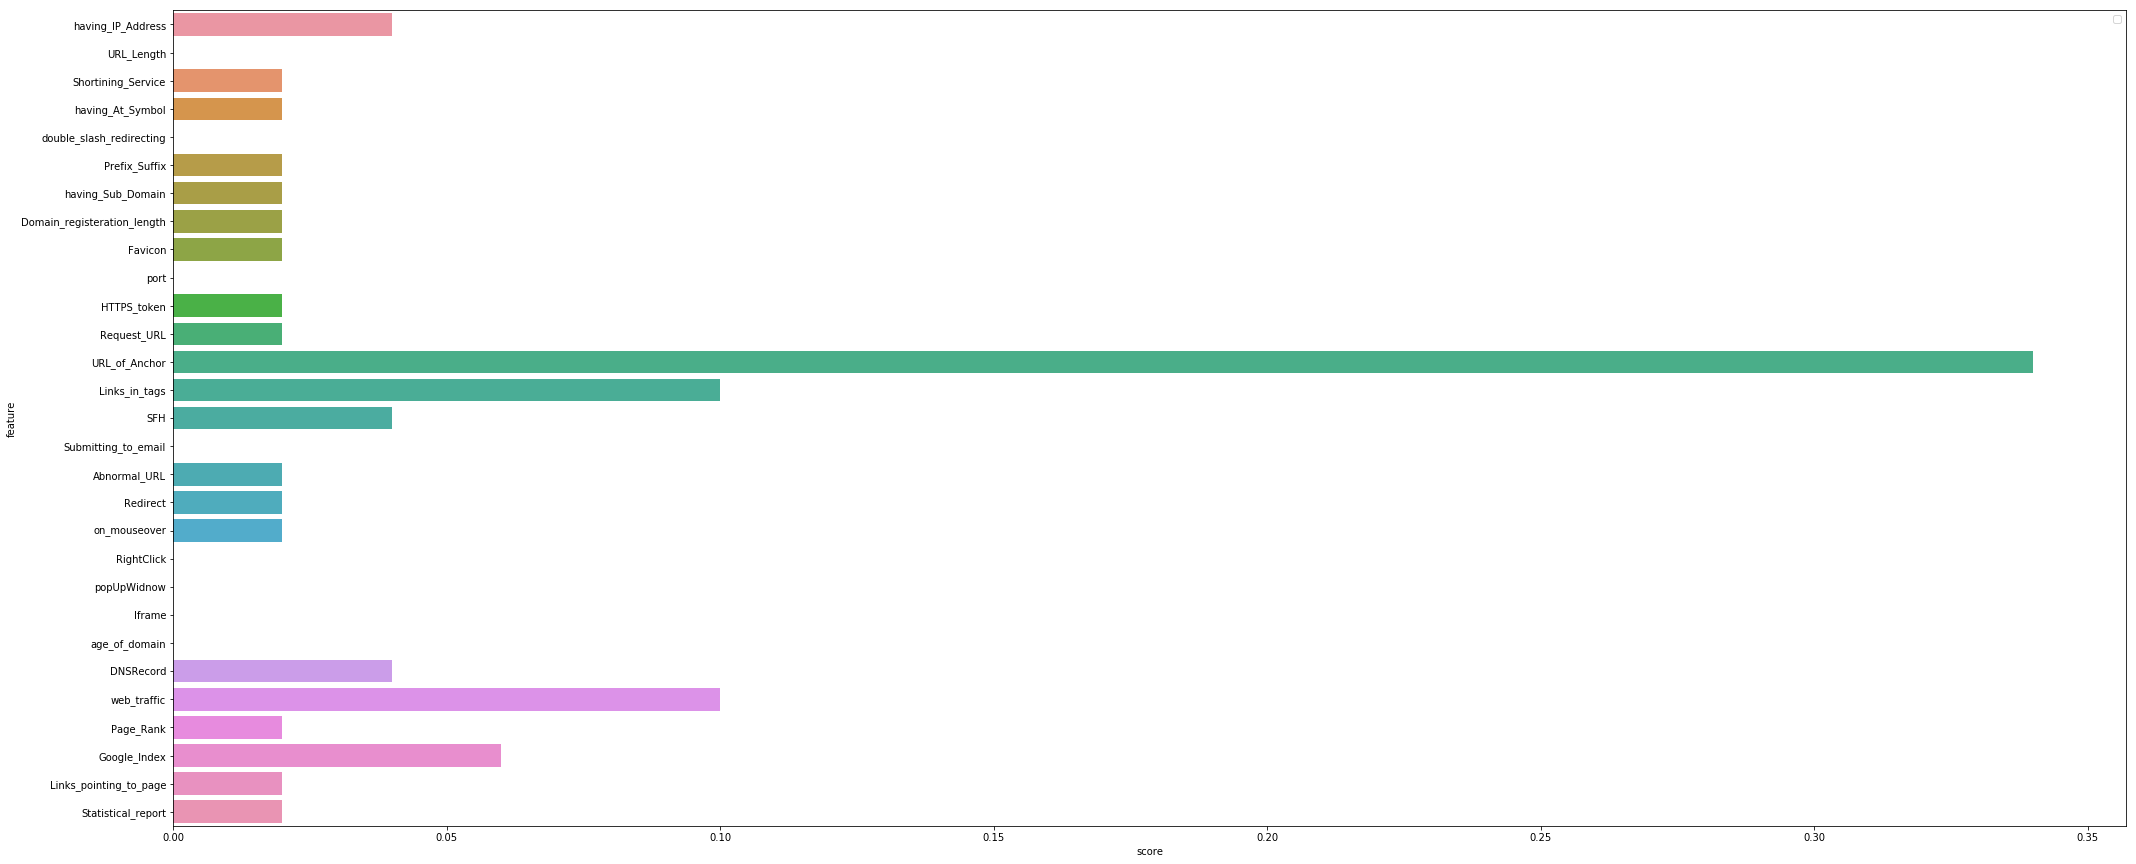

In [67]:
fi_rand = pd.DataFrame(zip(phising_data.columns, map(lambda x: round(x, 4), clf_ada.feature_importances_)), columns=['feature', 'score'])
fig, ax = plt.subplots(1, 1, figsize=(35, 15))
sns.barplot(x='score', y='feature', data=fi_rand, ax=ax)
ax.legend()

## Gradient boosting

No handles with labels found to put in legend.


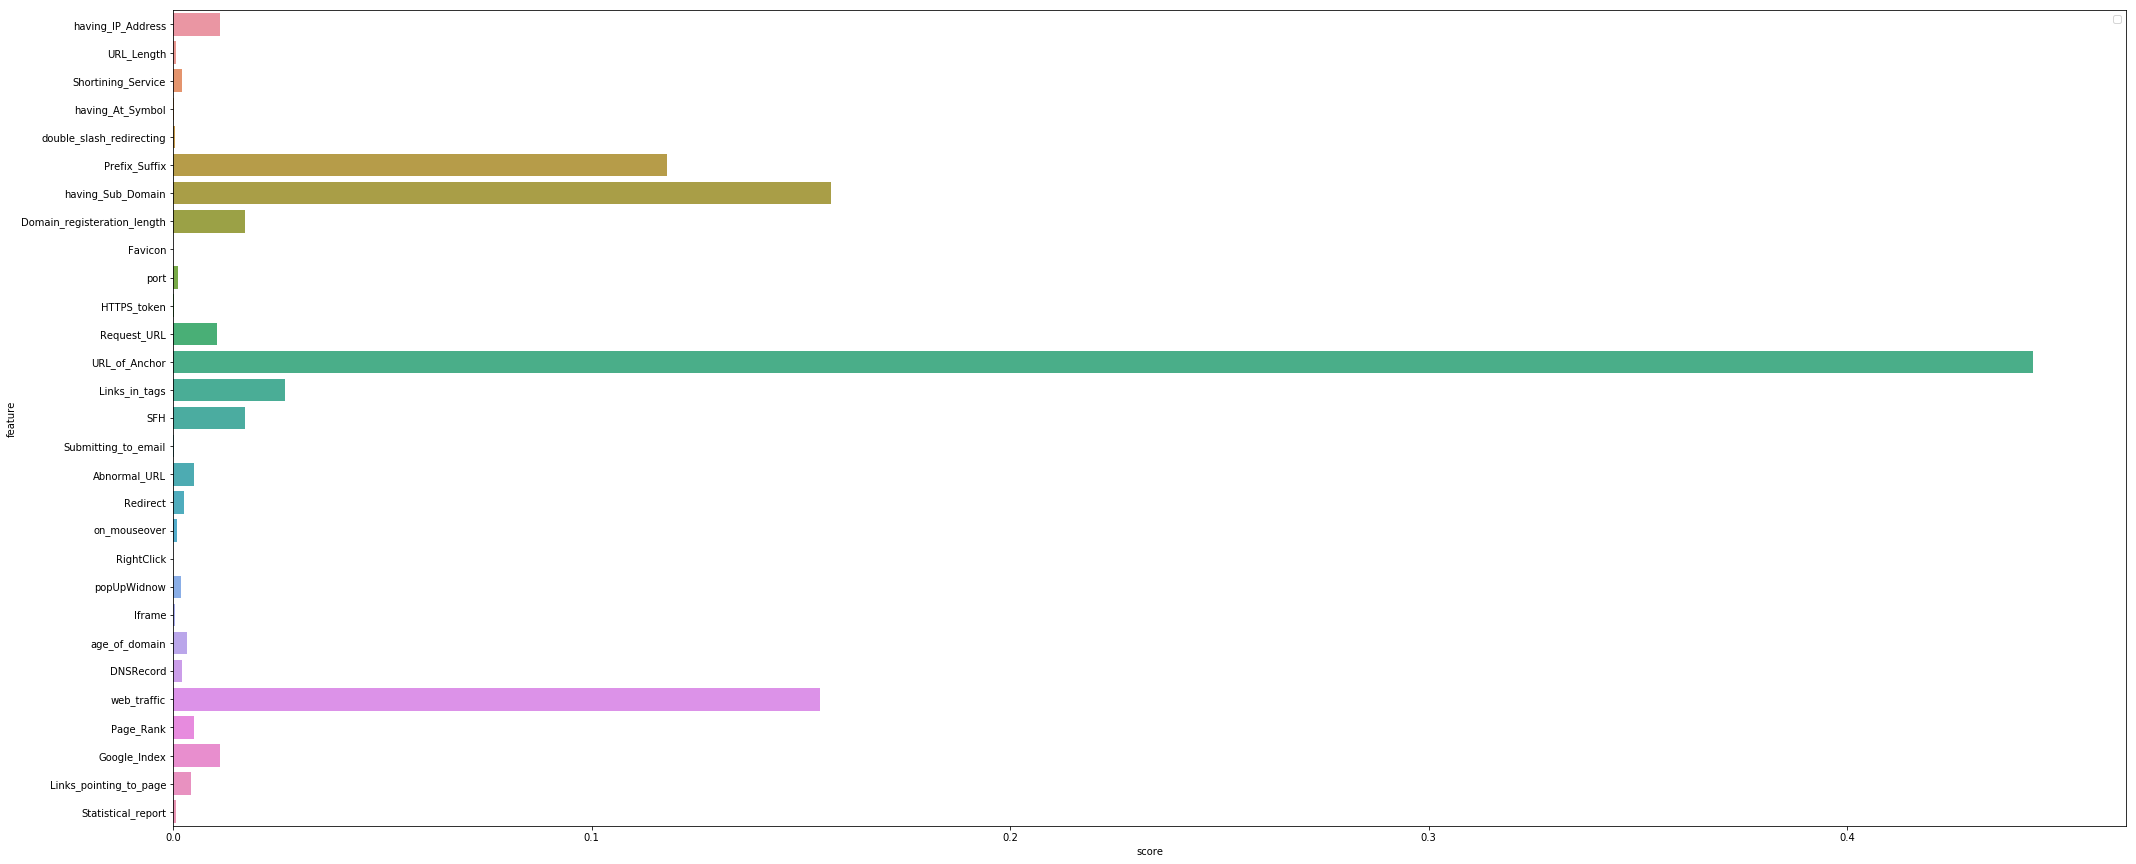

In [69]:
fi_rand = pd.DataFrame(zip(phising_data.columns, map(lambda x: round(x, 4), clf_grad.feature_importances_)), columns=['feature', 'score'])
fig, ax = plt.subplots(1, 1, figsize=(35, 15))
sns.barplot(x='score', y='feature', data=fi_rand, ax=ax)
ax.legend()

## Decision Tree

No handles with labels found to put in legend.


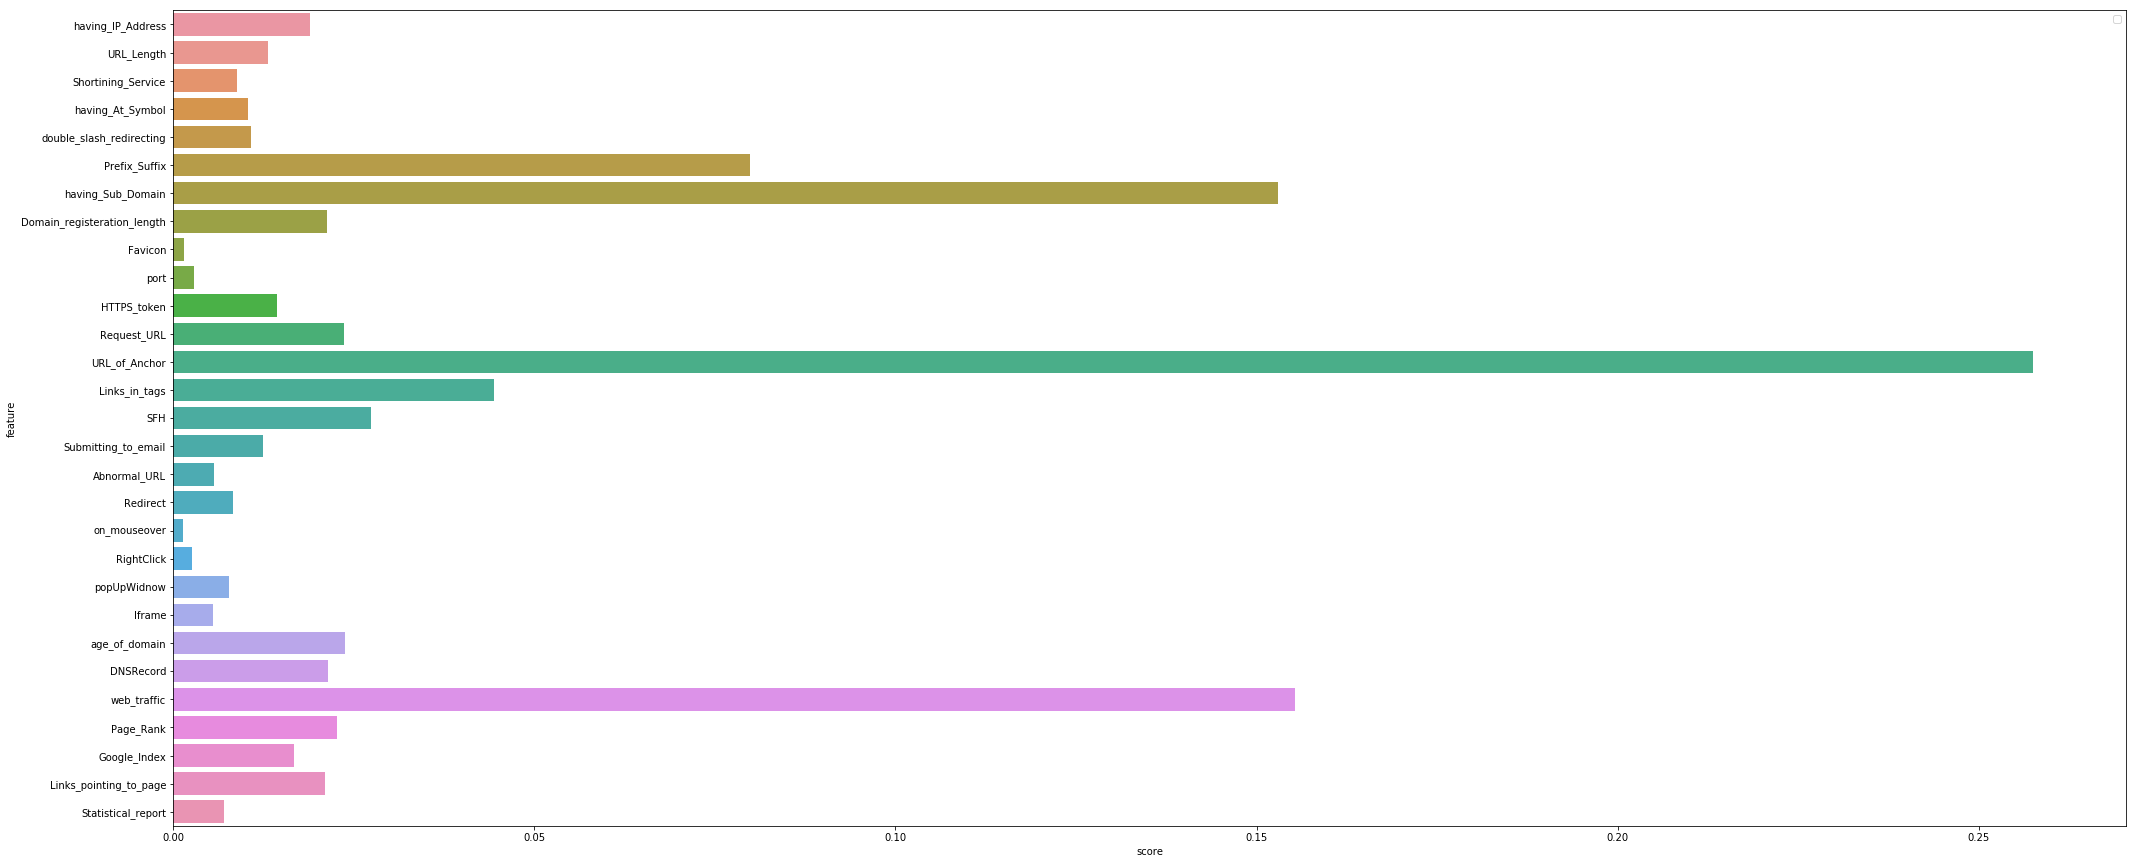

In [70]:
fi_rand = pd.DataFrame(zip(phising_data.columns, map(lambda x: round(x, 4), clf_tree.feature_importances_)), columns=['feature', 'score'])
fig, ax = plt.subplots(1, 1, figsize=(35, 15))
sns.barplot(x='score', y='feature', data=fi_rand, ax=ax)
ax.legend()